# THỐNG KÊ MÁY TÍNH VÀ ỨNG DỤNG (ĐTTX)

**Khoa Công nghệ Thông tin - ĐH Khoa học Tự nhiên TP. HCM ([fit@hcmus](https://www.fit.hcmus.edu.vn/))**

*Giảng viên: Vũ Quốc Hoàng (vqhoang@fit.hcmus.edu.vn)*

# BÀI 5 - TRỰC QUAN HÓA DỮ LIỆU VỚI MATPLOTLIB (Phần 3)

**Nội dung**

* [Histogram](#histogram)
  * [Histogram với các khoảng chia đều](#histogram_deu)
  * [Histogram với các khoảng chia không đều](#histogram_khong_deu)
  * [Histogram cho các nhóm](#histogram_nhom)
* [Biểu đồ mật độ](#bieu_do_mat_do)

**Tài liệu tham khảo**

* Chương 28, 36 [Python Data Science Handbook (Jake VanderPlas)](https://www.amazon.com/Python-Data-Science-Handbook-Essential-dp-1098121228/dp/1098121228/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## <a name="histogram"/>Histogram

**Histogram** là biểu đồ thể hiện phân bố của một đại lượng trên miền giá trị. Cụ thể, histogram cho thấy tần số (hay tần suất, mật độ) các mẫu dữ liệu trên các khoảng dữ liệu.

### <a name="histogram_deu"/>Histogram với các khoảng chia đều

Dữ liệu [`Iris Data Set`](https://archive.ics.uci.edu/ml/datasets/Iris).

In [2]:
iris_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris = pd.read_csv('iris.data', names=iris_names)
iris 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Ví dụ sau vẽ biểu đồ histogram cho thấy phân bố của sepal_length trong bộ dữ liệu Iris.

Trước hết, đếm số lượng (tần số) mẫu trong các khoảng chia đều.

In [3]:
iris.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [4]:
intervals = np.arange(4.0, 8.1, 0.5)
intervals

array([4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ])

In [5]:
counts, _ = np.histogram(iris.sepal_length, bins=intervals)
counts

array([ 4, 18, 30, 31, 32, 22,  7,  6], dtype=int64)

Vẽ histogram với các khoảng chia đều đã chọn bằng hàm [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) của Matplotlib.

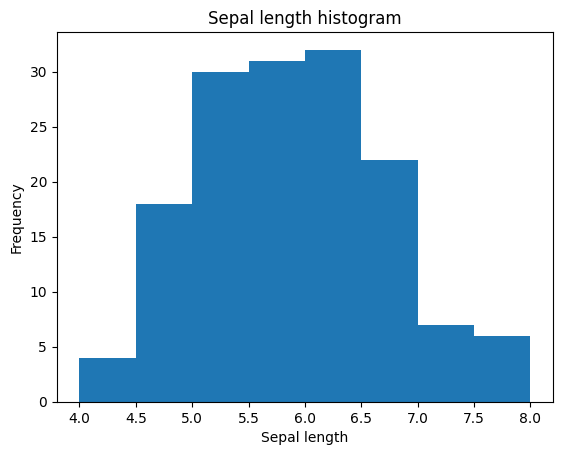

In [6]:
plt.hist(iris.sepal_length, bins=intervals)

plt.title("Sepal length histogram")
plt.xlabel("Sepal length")
plt.ylabel("Frequency")

plt.show()

Hoặc có thể vẽ histogram tiện hơn bằng phương thức [`hist`](https://pandas.pydata.org/docs/reference/api/pandas.Series.hist.html) của `Pandas`.

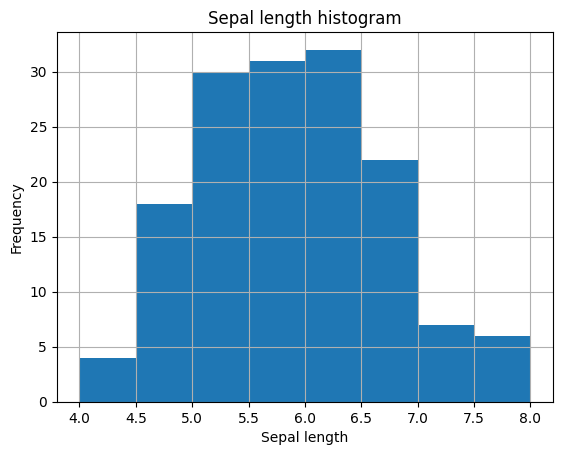

In [7]:
iris.sepal_length.hist(bins=intervals)

plt.title("Sepal length histogram")
plt.xlabel("Sepal length")
plt.ylabel("Frequency")

plt.show()

Từ biểu đồ histogram trên, ta nhận thấy, sepal_length phân bố nhiều trong khoảng giá trị từ 5 đến 6.5 (cm), và phân bố ít ở 2 bên (nhỏ hơn 5 và lớn hơn 7).

**Bài tập**. Vẽ histogram cho sepal_width với các khoảng chia đều.

In [8]:
# TODO:


### <a name="histogram_khong_deu"/>Histogram với các khoảng chia không đều

Cũng có thể dùng các khoảng chia không đều. (Đối chiếu với các khoảng chia đều ở trên.)

In [9]:
intervals = np.array([4.0, 5.0, 5.5, 6.0, 6.5, 8.0])
counts, _ = np.histogram(iris.sepal_length, bins=intervals)
props = counts / np.sum(counts)

pd.DataFrame({
    "Interval": ["{} - {}".format(intervals[i], intervals[i + 1]) for i in range(len(intervals) - 1)],
    "Frequency": counts,
    "Relative Frequency": np.round(props, 2),
    "Density": np.round(props / np.diff(intervals), 2)
})

,Interval,Frequency,Relative Frequency,Density
0,4.0 - 5.0,22,0.15,0.15
1,5.0 - 5.5,30,0.20,0.40
2,5.5 - 6.0,31,0.21,0.41
3,6.0 - 6.5,32,0.21,0.43
4,6.5 - 8.0,35,0.23,0.16


Đối với các khoảng chia không đều, cần vẽ histogram theo **mật độ** (density): diện tích của mỗi thanh tỉ lệ với **tần suất** (relative frequency, proportion), tức là chiều cao tỉ lệ với mật độ (tần suất/độ dài thanh).

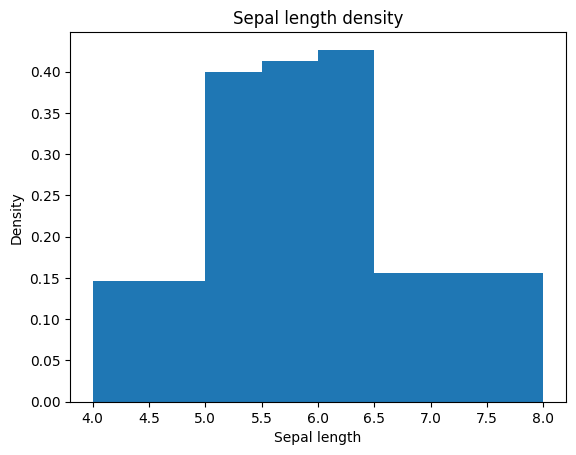

In [10]:
plt.hist(iris.sepal_length, bins=intervals, density=True)

plt.title("Sepal length density")
plt.xlabel("Sepal length")
plt.ylabel("Density")

plt.show()

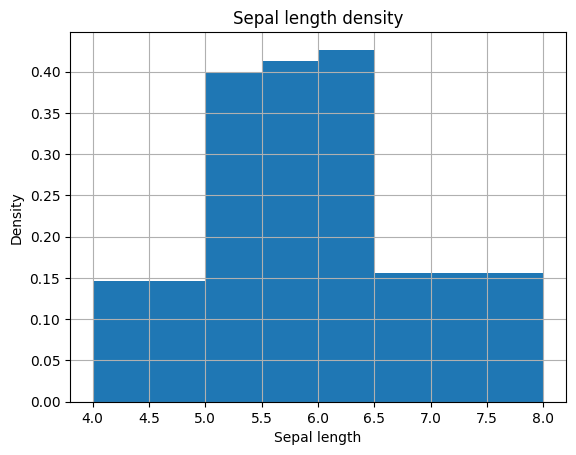

In [11]:
iris.sepal_length.hist(bins=intervals, density=True)

plt.title("Sepal length density")
plt.xlabel("Sepal length")
plt.ylabel("Density")

plt.show()

Ta cũng có thể dùng seaborn để vẽ histogram và density plot

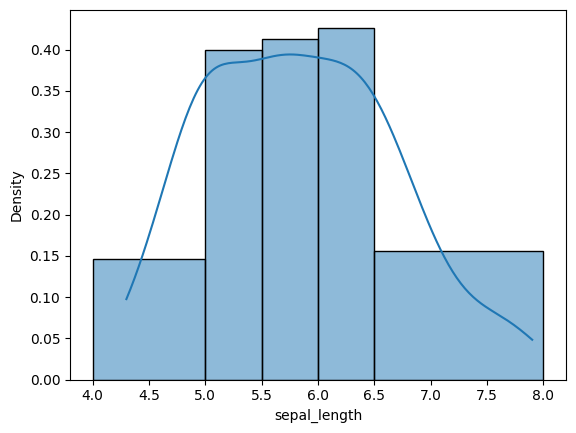

In [12]:
sns.histplot(iris.sepal_length, bins=intervals, stat="density", kde=True)
plt.show()

**Bài tập**. Vẽ histogram cho sepal_width với các khoảng chia: 1.5, 2.5, 2.8, 3.0, 3.2, 3.5, 4.5

In [13]:
# TODO:


### <a name="histogram_nhom"/>Histogram cho các nhóm

Phần này phân tích **phân phối** (distribution) của sepal_length theo các nhóm khác nhau của species.

In [14]:
sepal_lengths = np.array(iris.sepal_length)
intervals = np.arange(4.0, 8.1, 0.5)

class_names = iris.species.unique()
class_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Tách riêng sepal_length của các nhóm.

In [15]:
sepal_length_class = {group: sepal_lengths[iris.species == group] for group in class_names}
sepal_length_class

{'Iris-setosa': array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ]),
 'Iris-versicolor': array([7. , 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. ,
        6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6,
        6.8, 6.7, 6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6,
        5.5, 5.5, 6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7]),
 'Iris-virginica': array([6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8,
        5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2,
        6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. ,
        6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])}

Vẽ **histogram kề** (side-by-side histogram) cho các nhóm

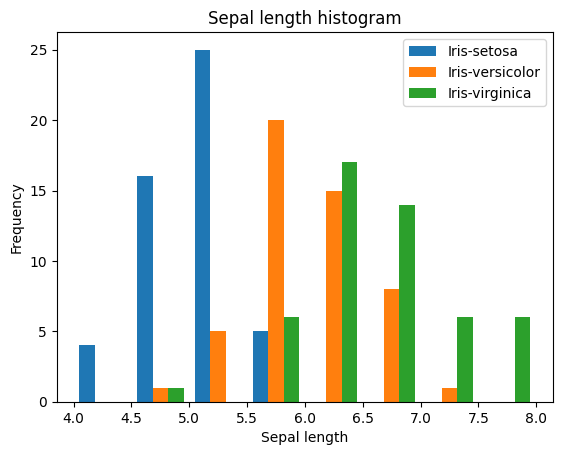

In [16]:
plt.hist(sepal_length_class.values(), bins=intervals, label=list(sepal_length_class.keys()))

plt.title("Sepal length histogram")
plt.xlabel("Sepal length")
plt.ylabel("Frequency")
plt.legend()

plt.show()

Vẽ **histogram xếp chồng** (stacked histogram) cho các nhóm

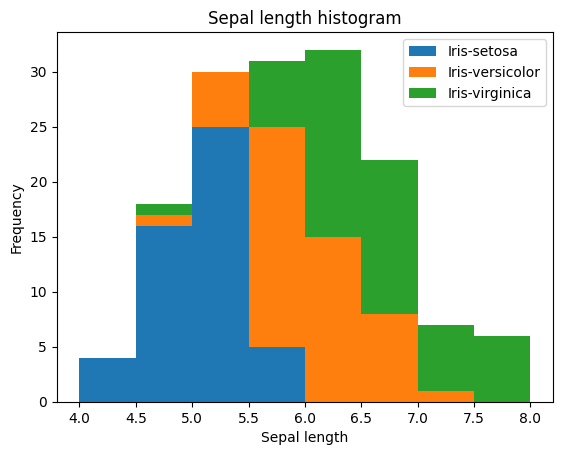

In [17]:
plt.hist(sepal_length_class.values(), bins=intervals, label=list(sepal_length_class.keys()), stacked=True)

plt.title("Sepal length histogram")
plt.xlabel("Sepal length")
plt.ylabel("Frequency")
plt.legend()

plt.show()

## <a name="bieu_do_mat_do"/>Biểu đồ mật độ

Tương tự như histogram, **biểu đồ mật độ** (density plot) mô tả phân phối của dữ liệu nhưng được vẽ "trơn" (smooth) hơn, giúp trực quan phân phối dữ liệu tốt hơn.

Vẽ biểu đồ mật với seaborn.

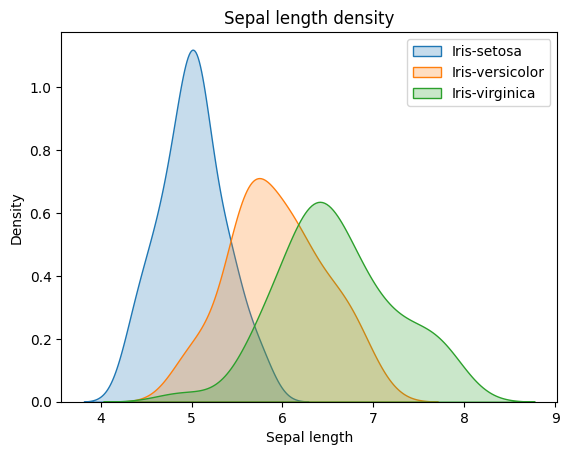

In [18]:
for group, splength in sepal_length_class.items():
    sns.kdeplot(splength, label=group, fill=True)
    
plt.title("Sepal length density")
plt.xlabel("Sepal length")
plt.ylabel("Density")
plt.legend()

plt.show()

Từ biểu đồ này ta thấy sepal_length của các nhóm Iris-setosa, Iris-versicolor, Iris-virginica tăng dần. Tuy nhiên, điều này chưa rõ ràng lắm vì biểu đồ mật độ của các nhóm còn "trùng lắp" nhau.

Khảo sát "chung" các biến của dữ liệu `Iris`.

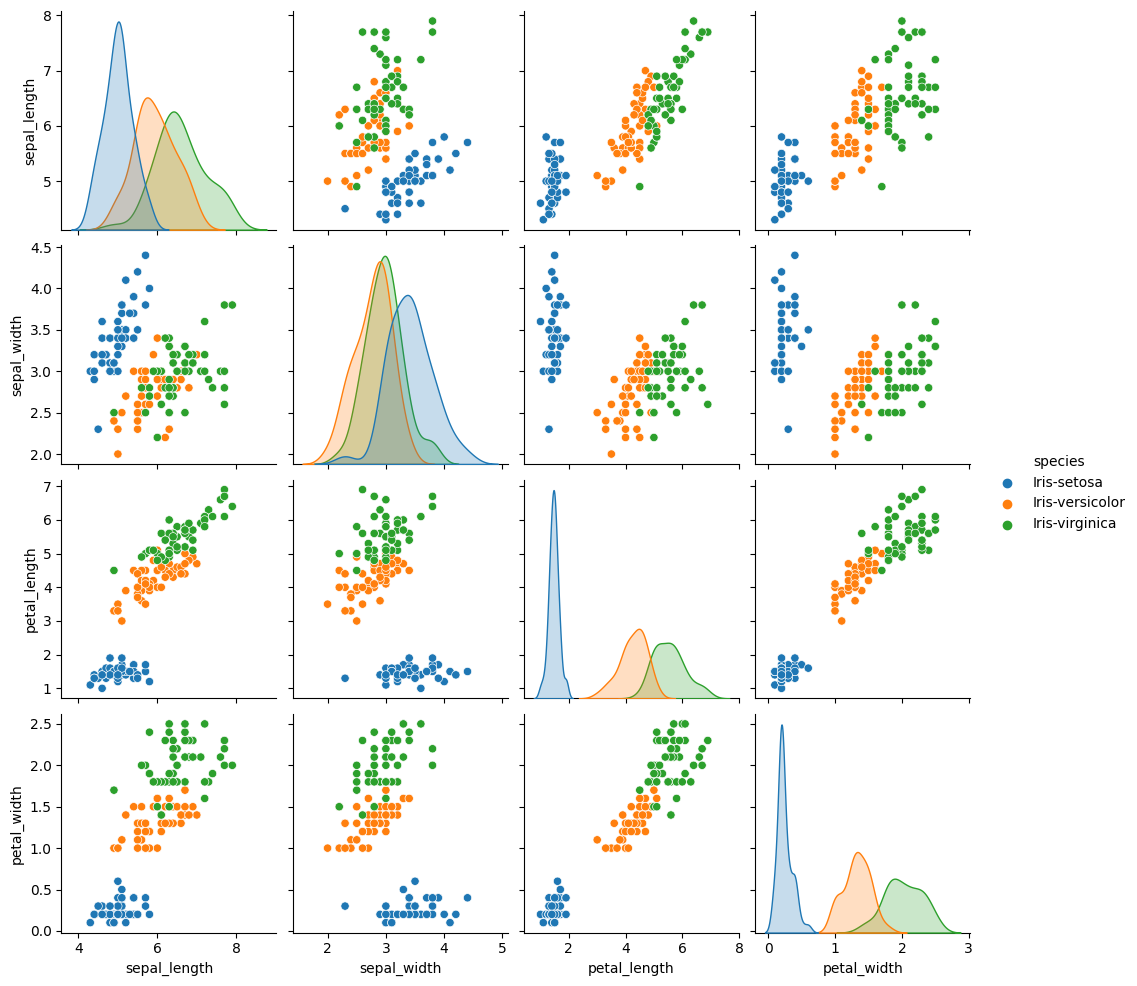

In [19]:
sns.pairplot(iris, hue="species")
plt.show()

Biểu đồ trên cho thấy các nhóm phân cách nhau khá tốt theo petal_width, chẳng hạn, ta có thể dùng petal_width để phân biệt 3 nhóm hoa Iris.

Ta cũng có thể chọn ra một số biến để phân tích.

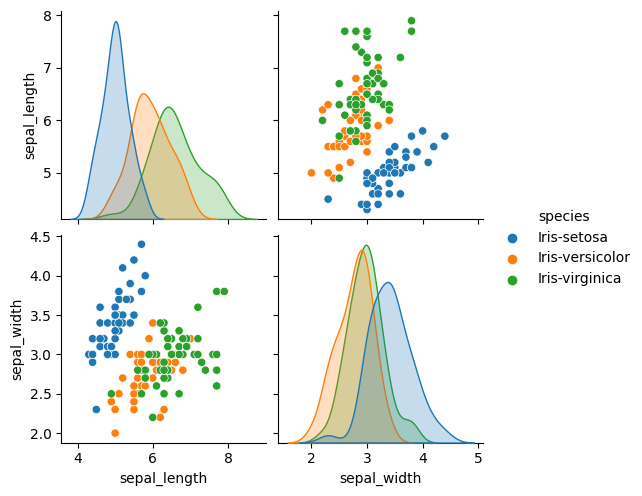

In [20]:
sns.pairplot(iris.loc[:, ["sepal_length", "sepal_width", "species"]], hue="species")
plt.show()

**Bài tập**. Vẽ pair plot cho cặp petal_length, petal_width và nhận xét.

In [21]:
# TODO:
